In [3]:
import os
path = os.getcwd()
print(path)

e:\DiveIntoCode\source


In [4]:
from sklearn.datasets import load_files
train_review = load_files('./Sprint21/aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./Sprint21/aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)


['neg', 'pos']


In [5]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [6]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]
  

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [8]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


### 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。<br>
　・This movie is SOOOO funny!!!<br>
　・What a movie! I never<br>
　・best movie ever!!!!! this movie<br>

In [69]:
mini_dataset = \
  ["This movie is SOOOO funny!!!",
  "What a movie! I never",
  "best movie ever!!!!! this movie"]

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [70]:
### 1-gram

# 文章を単語で分ける
word_1 = mini_dataset[0].lower().replace("!", "").split(" ")
word_2 = mini_dataset[1].lower().replace("!", "").split(" ")
word_3 = mini_dataset[2].lower().replace("!", "").split(" ")

mini_datalist = [word_1, word_2, word_3]

# 重複している単語を削除
word_set = set(word_1 + word_2 + word_3)
word_list = list(word_set)    # set()を使うとset型になるのでlist型へ戻す

# 格納＋結果表示用のデータフレームを設定
gram_1 = np.zeros([len(mini_datalist), len(word_list)]).astype("int")
gram_1 = pd.DataFrame(gram_1, columns=word_set)
display(gram_1)

# 単語の数を数える
for i, text in enumerate(mini_datalist):
    for word in word_list:
        word_count = text.count(word)
        gram_1.at[i, word] = word_count

display(gram_1)


,movie,i,never,a,best,this,ever,is,what,funny,soooo
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


,movie,i,never,a,best,this,ever,is,what,funny,soooo
0,1,0,0,0,0,1,0,1,0,1,1
1,1,1,1,1,0,0,0,0,1,0,0
2,2,0,0,0,1,1,1,0,0,0,0


In [135]:
## 2-gram

# 2つの単語をまとめる(2つの単語で1つの単語とみなす)
two_word_1 = []
two_word_2 = []
two_word_3 = []

# 単語をスペースで区切った配列
two_mini_datalist = []

for i, text in enumerate(mini_datalist):
    split_space_word = ""
    for j in range(len(text)):
        if j == 0:
            split_space_word = text[j]
            pass
        else:
            split_space_word += " " + text[j]
            if i == 0:
                two_word_1.append(text[j-1] + " " + text[j])
            elif i == 1:
                two_word_2.append(text[j-1] + " " + text[j])
            else:
                two_word_3.append(text[j-1] + " " + text[j])
    two_mini_datalist.append(split_space_word)

# 重複している単語を削除
two_word_list = set(two_word_1 + two_word_2 + two_word_3)
two_word_list = list(two_word_list)  # set()を使うとset型になるのでlist型へ戻す

# print(two_mini_datalist)    # 単語をスペースで区切った配列
# print(two_word_list)
# print(mini_datalist)

# 格納＋結果表示用のデータフレームを設定
gram_2 = np.zeros([len(mini_datalist), len(two_word_list)]).astype("int")
gram_2 = pd.DataFrame(gram_2, columns=two_word_list)

# display(gram_2)

for i in range(len(mini_datalist)):
    for j, text in enumerate(mini_datalist[i]):
        for k in range(len(two_word_list)):
            cnt = 0
            if j == 0:
                pass
            else:
                if two_word_list[k] == (str(mini_datalist[i][j-1]) + " " + str(mini_datalist[i][j])):
                    cnt += 1
                    gram_2.at[i, two_word_list[k]] = cnt

# for i, text in enumerate(two_word_list):
#     for j in range(len(mini_datalist)):
#         cnt = 0
#         if j == 0:
#             pass
#         else:
#             print("==========")
#             print(text)
#             print(str(mini_datalist[j-1]) + " " + str(mini_datalist[j]))
#             if text == (str(mini_datalist[j-1]) + " " + str(mini_datalist[j])):
#                 cnt += 1
#         gram_2.at[j, text] = cnt

display(gram_2)


,best movie,movie i,is soooo,movie ever,a movie,movie is,soooo funny,ever this,what a,i never,this movie
0,0,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,0,1,0,0,1


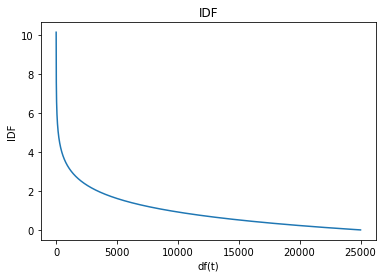

In [136]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()


In [137]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)


,a,best,ever,funny,i,movie,never,soooo,this,what
0,0,0,0,1,0,1,0,1,1,0
1,1,0,0,0,1,1,1,0,0,1
2,0,1,1,0,0,2,0,0,1,0


In [139]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...


stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\8thrivebell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [140]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)


,a,best,ever,movie,this
0,0,0,0,1,1
1,1,0,0,1,0
2,0,1,1,2,1


### 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。<br>
NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。<br>


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words= stop_words, max_features=5000)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

print(X_train.shape, X_test.shape)


(25000, 5000) (25000, 5000)


### 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。<br>
モデルは2値分類が行える任意のものを利用してください。<br>

In [147]:
import lightgbm as lgb
from sklearn.metrics import f1_score

print(type(y_test))
lgb = lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgb.predict(X_test)

print("{}".format(lgb.score(X_test, y_test)))


<class 'numpy.ndarray'>
0.57248


### 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。<br>
標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。<br>
　・This movie is SOOOO funny!!!<br>
　・What a movie! I never<br>
　・best movie ever!!!!! this movie<br>

In [149]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))


語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.0272975   0.04907195 -0.00921407 -0.0305853   0.00762902  0.00571693
  0.00497991 -0.00960334 -0.03132654 -0.01629746]
movieのベクトル : 
[-0.00929582 -0.04023977  0.04547358  0.03467464 -0.02374852 -0.04818412
  0.04046446 -0.00393111 -0.00817834  0.01577319]
isのベクトル : 
[-0.02848024 -0.02589394 -0.01252699 -0.03586797  0.02094474 -0.04450691
 -0.04376658  0.00828507 -0.02714551 -0.04789032]
veryのベクトル : 
[-0.00166327 -0.00347041  0.00456427 -0.01322539 -0.02941054  0.01676329
 -0.01100955 -0.00832791  0.03771479 -0.00707501]
goodのベクトル : 
[-0.00837072  0.00894872  0.03584314 -0.04515008  0.03215136 -0.00787263
  0.00628949  0.00035796  0.03737636  0.04789172]
filmのベクトル : 
[-0.0205833   0.01652623 -0.01555952  0.00790092  0.04695166 -0.01252826
  0.0245461  -0.04189821 -0.00041078 -0.0140261 ]
aのベクトル : 
[ 0.01079179 -0.00645665 -0.03513794  0.03601087  0.01164853  0.04451543
  0.00907317 -0.0357643

D:\anaconda3\envs\DIC21env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [150]:
model.wv.most_similar(positive="good", topn=3)


[('bad', 0.4185171127319336),
 ('very', 0.1327618956565857),
 ('film', 0.06652997434139252)]

D:\anaconda3\envs\DIC21env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


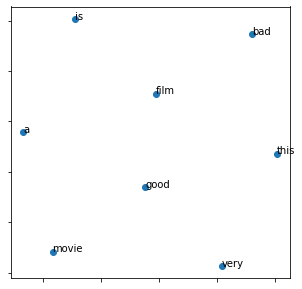

In [151]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


In [158]:
model_2 = Word2Vec(min_count=1, size=10)
model_2.build_vocab(x_train)
model_2.train(x_train, total_examples=model_2.corpus_count, epochs=model_2.iter)


D:\anaconda3\envs\DIC21env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(36012295, 165633705)

### 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。<br>
また、単語（トークン）はリストで分割してください。<br>


In [171]:
import re

re_x_train = []

for str in x_train:
    re_str = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+$,%#]+)", "" , str)
    re_str = re.sub(r"[^0-9a-zA-Z ]", "", re_str) 
    re_str = re_str.lower()
    re_x_train.append(re_str)

print(len(re_x_train))
print(type(re_x_train))
# print(re_x_train)


25000
<class 'list'>


### 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。<br>


In [170]:
model = Word2Vec(min_count=1, size=10) 
model.build_vocab(re_x_train) 
model.train(re_x_train, total_examples=model.corpus_count, epochs=model.iter)


D:\anaconda3\envs\DIC21env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(27014355, 158955400)